# Keras IMDB Reviews

Using a keras model for IMDB review prediction

In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

Since we are restricting to the top 10,000 words, no word index will exceed 10,000. You can confirm this:

In [4]:
max([max(sequence)for sequence in train_data])

9999

The dataset currently includes lists. However to feed them into our model we will need to vectorize and one hot encode them using the following helper function

In [5]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Convert the lables to vectors as well

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Builidng the model

* Two intermediate layers with 16 hidden units each
* A third layer that will output the scalar prediction regarding the sentiment of the current review




In [8]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Because we are solving a binary classification problem, it is best to use the `binary_crossentropy` loss function

The optimizer we will use is `rmsprop`

Finally we will use the `accuracy` metrics to measure 

Compiling the model


In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Create a validation set from the training set

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train the model with `20 epochs` over the training set in `mini batch size of 512`

In [11]:
history=model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.5445 - accuracy: 0.8007 - val_loss: 0.4228 - val_accuracy: 0.8640
Epoch 2/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.3459 - accuracy: 0.8941 - val_loss: 0.3299 - val_accuracy: 0.8814
Epoch 3/20
15000/15000 [==============================] - 1s 67us/step - loss: 0.2527 - accuracy: 0.9205 - val_loss: 0.2890 - val_accuracy: 0.8886
Epoch 4/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.1974 - accuracy: 0.9371 - val_loss: 0.2849 - val_accuracy: 0.8872
Epoch 5/20
15000/15000 [==============================] - 1s 64us/step - loss: 0.1626 - accuracy: 0.9463 - val_loss: 0.2734 - val_accuracy: 0.8892
Epoch 6/20
15000/15000 [==============================] - 1s 64us/step - loss: 0.1355 - accuracy: 0.9579 - val_loss: 0.2850 - val_accuracy: 0.8855
Epoch 7/20
15000/15000 [==============================] - 1s 65us/s

The call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training.

In [12]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Plotting the training job

In [14]:
!pip3 install matplotlib

     |████████████████████████████████| 13.2 MB 4.9 MB/s eta 0:00:01
  Using cached kiwisolver-1.1.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (113 kB)
     |████████████████████████████████| 67 kB 16.4 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [16]:
len(history_dict['loss'])

20

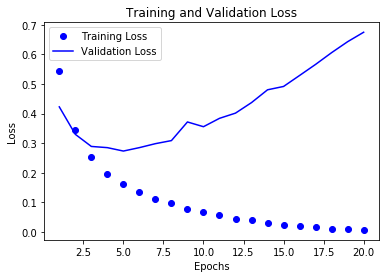

In [27]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) #number of epochs +1 for graph

#print("loss_values:" , loss_values)
#print("val_loss:" , val_loss)
#print("epochs:" , epochs)


plt.plot(epochs,loss_values, 'bo', label = "Training Loss") # 'bo' == blue dot for training loss
plt.plot(epochs,val_loss, 'b', label = "Validation Loss" ) # 'b' == blue line for validation loss
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()






Plotting the training and validation accuracy

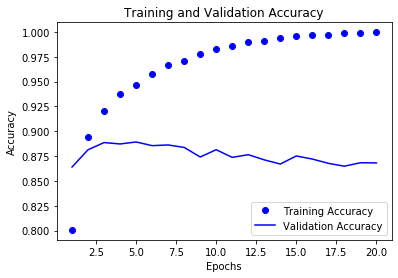

In [28]:
history_dict=history.history
acc_values = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1) #number of epochs +1 for graph

#print("loss_values:" , loss_values)
#print("val_loss:" , val_loss)
#print("epochs:" , epochs)


plt.plot(epochs,acc_values, 'bo', label = "Training Accuracy") # 'bo' == blue dot for training loss
plt.plot(epochs,val_acc, 'b', label = "Validation Accuracy" ) # 'b' == blue line for validation loss
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


### Overfitting
Training loss decreases consistently as the number of epochs increases. The training accuracy also increases consistently with each new epoch.

However this is NOT the case with validation. The loss starts to increase around 4-5 epoch and the accuracy seems to drop around the same. 

This is case of overfitting


### Retraining 
To prevent this overfitting , let's retrain the model form scratch with 4 epochs

In [29]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,
          y_train,
          epochs=4,
          batch_size=512)

results = model.evaluate(x_test,y_test)




Epoch 1/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.4747 - accuracy: 0.8176
Epoch 2/4
25000/25000 [==============================] - 1s 42us/step - loss: 0.2738 - accuracy: 0.9065
Epoch 3/4
25000/25000 [==============================] - 1s 43us/step - loss: 0.2103 - accuracy: 0.9260
Epoch 4/4
25000/25000 [==============================] - 2s 86us/step


In [30]:
results

[0.289226514043808, 0.885200023651123]

### Prediction
Using the model for prediction

After having trained a network, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method

In [31]:
model.predict(x_test)

array([[0.22255903],
       [0.9995301 ],
       [0.9417792 ],
       ...,
       [0.12294713],
       [0.09870456],
       [0.73725826]], dtype=float32)